In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gdf = gpd.read_file("/root/ucsb/spring_2025/Fire_Plants/shapefile/shapefile/quads3310-20131231.shp")

In [ ]:
print(type(gdf))
print(gdf.columns)
# print(gdf.head())

first_geom = gdf.geometry.iloc[0]
# print(first_geom)
print(first_geom.geom_type)
print("Exterior:")
for x, y in first_geom.exterior.coords:
    print(f"    ({x}, {y})")

# print(len(first_geom.exterior.coords)) #has 33 points



<class 'geopandas.geodataframe.GeoDataFrame'>
Index(['ID', 'SPECIES_ID', 'QUAD_ID', 'SPECIES', 'QUAD_NAME', 'ABUNDANCE',
       'SPREAD', 'ABUNSPREAD', 'MANAGEMENT', 'DATE', 'SOURCE', 'PARTICIPAN',
       'OBS_NOTES', 'OB_VALUE', 'geometry'],
      dtype='object')
Polygon
Exterior:
    (-10721.23900001078, 248224.15189999528)
    (-9309.200300009401, 248222.41669999994)
    (-7897.159600012141, 248220.92710000183)
    (-6485.118900009996, 248219.68750000093)
    (-5073.076100009286, 248218.6935999971)
    (-3661.0354000102434, 248217.94549999852)
    (-2248.994800011647, 248217.44720000122)
    (-836.9541000126154, 248217.19470000453)
    (-88.40090000986963, 248217.16169999354)
    (-88.39950000898767, 247239.78169999924)
    (-88.3968000111861, 245396.05140000023)
    (-88.39410000971422, 243552.2965000011)
    (-88.39140000894412, 241708.51900000498)
    (-88.38870001025921, 239864.71900000237)
    (-88.38590000772054, 238020.89420000836)
    (-88.38320000863816, 236177.0490000015)


<Axes: >

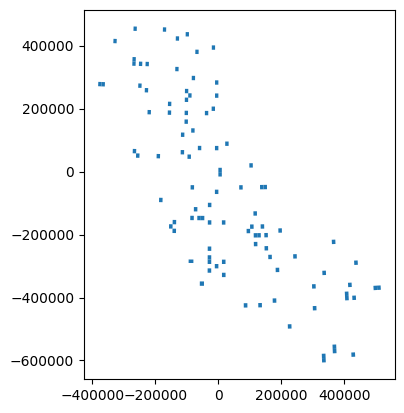

In [8]:
gdf[:100].plot() #weeds

In [24]:
print(gdf.columns)

filtered = gdf[['ID', 'SPECIES_ID', 'QUAD_ID', 'ABUNDANCE',
       'SPREAD', 'DATE', 'geometry']]

print(gdf[gdf['QUAD_ID']==514])

print(len(list(set(gdf['SPECIES_ID']))))

# 265 species, 2856 plots

Index(['ID', 'SPECIES_ID', 'QUAD_ID', 'SPECIES', 'QUAD_NAME', 'ABUNDANCE',
       'SPREAD', 'ABUNSPREAD', 'MANAGEMENT', 'DATE', 'SOURCE', 'PARTICIPAN',
       'OBS_NOTES', 'OB_VALUE', 'geometry'],
      dtype='object')
            ID  SPECIES_ID  QUAD_ID                     SPECIES     QUAD_NAME  \
0       552874         101      514     Zantedeschia aethiopica  CALNEVA LAKE   
3707      8748         104      514        Aegilops triuncialis  CALNEVA LAKE   
4479     11484         150      514        Ageratina adenophora  CALNEVA LAKE   
11589    50624         106      514  Avena barbata and A. fatua  CALNEVA LAKE   
13746    61730          55      514     Brachypodium sylvaticum  CALNEVA LAKE   
...        ...         ...      ...                         ...           ...   
542787  536143         204      514         Undaria pinnatifida  CALNEVA LAKE   
545053  538967         205      514           Verbascum thapsus  CALNEVA LAKE   
548477  544481         149      514              Fes

In [ ]:
# Group by SPECIES_ID and count unique QUAD_IDs per species
species_quad_counts = gdf.groupby('SPECIES_ID')['QUAD_ID'].nunique()

# Filter for species found in more than one QUAD_ID
multi_quad_species = species_quad_counts[species_quad_counts > 1]

# Print results
print("Species found in multiple QUAD_IDs:")
print(multi_quad_species)

species_id = 1  # e.g., 'SP123' or 42
quad_ids = gdf[gdf['SPECIES_ID'] == species_id]['QUAD_ID'].unique()

print(f"QUAD_IDs for SPECIES_ID {species_id}:")
print(quad_ids)

Species found in multiple QUAD_IDs:
SPECIES_ID
1          2785
2          2802
3          2765
4          2798
5          2804
           ... 
12056         5
2173159       4
2301425       4
2665859       3
2953417      12
Name: QUAD_ID, Length: 245, dtype: int64
QUAD_IDs for SPECIES_ID 1:
2785


In [35]:
gdf2 = gpd.read_file("/root/ucsb/spring_2025/Fire_Plants/shapefile/shapefile/Perimeters.shp") #fire

/root/ucsb/spring_2025/Fire_Plants/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: /root/ucsb/spring_2025/Fire_Plants/shapefile/shapefile/Perimeters.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [ ]:
print(gdf2.columns)

first_geom_2 = gdf2.geometry.iloc[156]
# print(first_geom)
print(first_geom_2.geom_type)
# print(type(first_geom_2.exterior.coords))
print("Exterior:")
for x, y in first_geom_2.exterior.coords:
    print(f"    ({x}, {y})")

print(len(gdf.geometry.iloc[122].exterior.coords)) #also has 33 points
print(len(first_geom.exterior.coords)) #has 33 points

#observaton: maybe the fire and weeds both have 33 exterior coords per entry ?

Index(['geometry'], dtype='object')
Polygon
Exterior:
<class 'shapely.coords.CoordinateSequence'>
    (-113.990697506557, 42.6937785597423)
    (-113.990684850193, 42.6937574383041)
    (-113.990580579145, 42.6937041711804)
    (-113.990424927157, 42.6936294048648)
    (-113.99027648415, 42.6935767661924)
    (-113.99014882726, 42.6935223678988)
    (-113.990008849975, 42.6934333940026)
    (-113.989877085988, 42.6933188132738)
    (-113.989735768417, 42.6932066211445)
    (-113.989544994997, 42.6931291313257)
    (-113.989367550779, 42.6930363009534)
    (-113.989227572596, 42.6929722207987)
    (-113.98912070362, 42.6929377301413)
    (-113.989037387573, 42.6929308152368)
    (-113.988873101877, 42.6928837512137)
    (-113.988718288017, 42.6928135522594)
    (-113.988589457927, 42.6927771738253)
    (-113.988543693255, 42.6927697987005)
    (-113.988385190913, 42.692751568207)
    (-113.988230545039, 42.6927596980134)
    (-113.988055279235, 42.6927599079767)
    (-113.98788051559, 4

In [37]:
gdf2_aligned = gdf2.to_crs(gdf.crs)

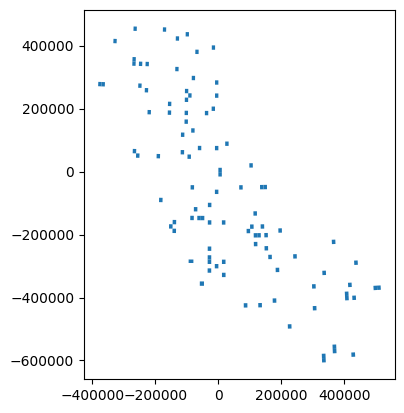

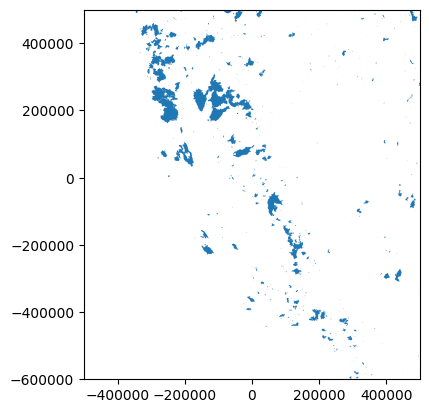

In [38]:
# gdf.plot() #plots hole state of cali
gdf[:100].plot()
gdf2_aligned.plot()
plt.xlim(-500000,500000)
plt.ylim(-600000,500000)
plt.show()

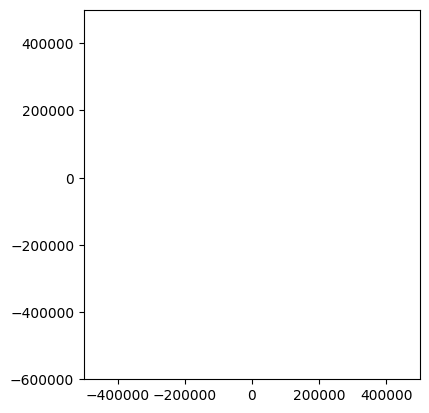

In [74]:
# gdf.plot() #plots hole state of cali
# gdf[:10].plot()
gdf2_aligned[-1:].plot()
plt.xlim(-500000,500000)
plt.ylim(-600000,500000)

# plt.xlim(-100000,100000)
# plt.ylim(200000,400000)
plt.show()

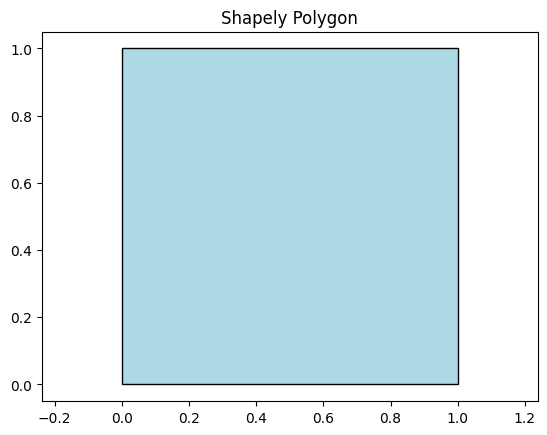

In [69]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Define your polygon
poly = Polygon([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)])

# Extract x and y from the exterior ring
x, y = poly.exterior.xy

# Plot using matplotlib
plt.figure()
plt.fill(x, y, color='lightblue', edgecolor='black')
plt.title("Shapely Polygon")
plt.axis('equal')  # Keep the aspect ratio square
plt.show()



In [ ]:
#Index by quad

#Index by fire

#Clustering weeds would give biomes

#Similarity score on weeds based on minimum percentage of shared quads



In [ ]:
#Plot number of abundant quads vs number of fires where weeds were present

#Find line of best fit and find correlation coefficient to see if weeds and fires are just related by abundance or 
#If it is more reigonal/weed specific. 